In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"C:\Users\rutvi\Downloads\train.xlsx")

In [44]:
X = data.iloc[:, :-1]  
X

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-64,-57,-68,-70,-58,-45,-55,-58,-62,-70,-71,-72,-61,-47,-59,-53,-61,-55
9996,-71,-74,-70,-66,-81,-63,-64,-69,-66,-62,-64,-62,-63,-57,-53,-54,-61,-58
9997,-71,-61,-66,-62,-63,-79,-70,-84,-85,-70,-81,-68,-63,-69,-87,-86,-79,-79
9998,-68,-61,-78,-78,-73,-77,-72,-81,-95,-73,-75,-79,-62,-69,-84,-95,-78,-78


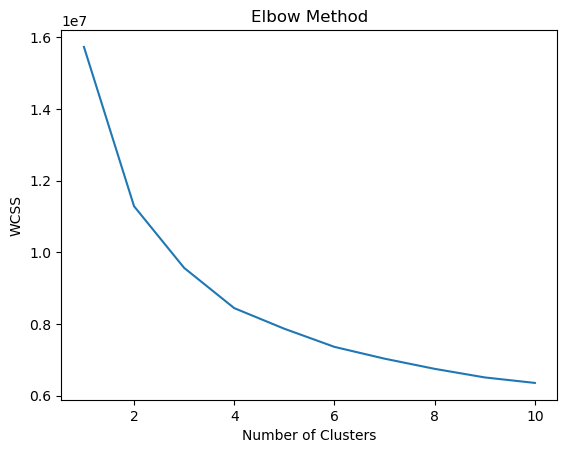

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Perform clustering using K-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

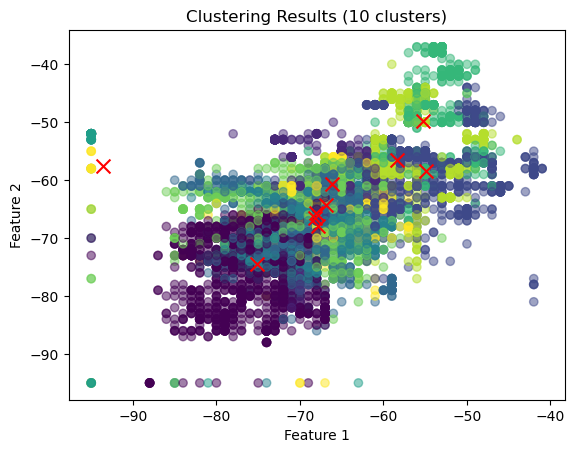

In [34]:
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy array
X_array = X.values

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the data points with color representing the assigned cluster
plt.scatter(X_array[:, 0], X_array[:, 1], c=labels, cmap='viridis', alpha=0.5, marker='o')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results (10 clusters)')
plt.show()


In [35]:

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# User interaction
def predict_cluster(data_point):
    cluster = kmeans.predict([data_point])[0]
    return cluster

In [36]:

# Example usage:
example_data_point = np.array([-70, -61, -66, 99, -51, -63, -82, -57, 76, -78, -66, -66, -61, -59, -73, -75, -63, 77])
predicted_cluster = predict_cluster(example_data_point)
print("Predicted cluster:", predicted_cluster)


Predicted cluster: 4
